## Model and ata simulation

In [1]:
import numpy as np

# Simulate the time series input data
def simulate_time_series(timesteps=10, features=4):
    return np.random.rand(timesteps, features)

# Define a simple prediction model that averages the features over the past 4 timesteps
def f_pred(time_series):
    if len(time_series) < 4:
        raise ValueError("Time series data should have at least 4 timesteps.")
    
    # Take the average of the last 4 timesteps for each feature
    return np.mean(time_series[-4:], axis=0)

# Define the mean squared error (MSE) loss function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Generate simulated time series data
y = simulate_time_series(timesteps=10, features=4)
y


array([[0.66640111, 0.41398501, 0.15414097, 0.27521098],
       [0.34184633, 0.06838733, 0.39622972, 0.02526731],
       [0.83357562, 0.1932997 , 0.55780386, 0.59497929],
       [0.08980744, 0.79310398, 0.94544352, 0.88942773],
       [0.06764779, 0.14645987, 0.62696899, 0.10721819],
       [0.49928832, 0.99583629, 0.95088682, 0.55514658],
       [0.69495492, 0.70172446, 0.60937562, 0.16393862],
       [0.85086266, 0.99508916, 0.11156887, 0.19359423],
       [0.89833098, 0.69101269, 0.81531011, 0.28650917],
       [0.83985529, 0.4656136 , 0.74689062, 0.58749457]])

## MTSexpSHAP

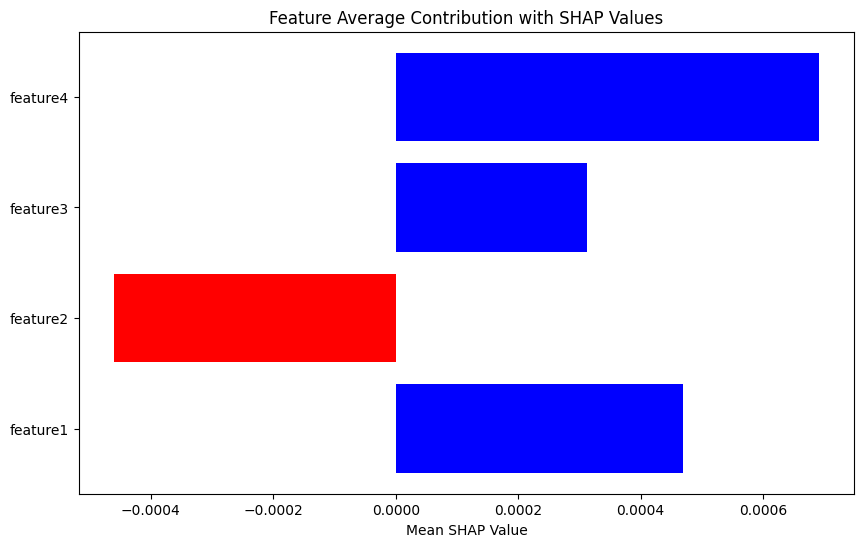

In [2]:
# Initialize the SHAP explainer
from explainers.mtsexpshap import MTSexpSHAP


shap_exp = MTSexpSHAP()
shap_exp.fit_exp(
    model=f_pred,
    loss=mse,
    feature_name_list=['feature1', 'feature2', 'feature3', 'feature4'],
    label_names=['feature2']
)

# Compute SHAP values
shap_values, perturbed_data = shap_exp.shap_values(y)

# Plot SHAP values
shap_exp.plot_shap_values(shap_values)

In [3]:
print("Shapley Values: ", shap_values)

Shapley Values:  [ 0.00047004 -0.00045991  0.00031312  0.00069119]


In [4]:
perturbed_data

array([[0.43299681, 0.08459982, 0.660815  , 0.61182582],
       [0.46024291, 0.8256594 , 0.16031638, 0.54621869],
       [0.57630786, 0.60492432, 0.4571234 , 0.76138713],
       [0.73344185, 0.83720848, 0.56107061, 0.35905869],
       [0.33239147, 0.05387685, 0.79225288, 0.12093286],
       [0.22483823, 0.31390138, 0.20918623, 0.90781278],
       [0.19963572, 0.42900976, 0.34192226, 0.20230033],
       [0.76916581, 0.72182416, 0.78944623, 0.05956232],
       [0.85479799, 0.68860774, 0.95397503, 0.21299662],
       [0.85077594, 0.01075711, 0.88973514, 0.28691453]])